<a href="https://colab.research.google.com/github/JotaMTB/Python_exercises/blob/master/Airplane_Crashes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis DataSet "Accidentes de Aviones" desde 1908 hasta 2009

Fuente: https://data.world/data-society/airplane-crashes

El análisis se centrará en los componentes cuantitativos de los fallecidos: número de pasajeros, cuántos de ellos fallecieron y el número de fallecidos en tierra a consecuencia del accidente.

Se pretenden segmentar los accidentes de acuerdo a sus pasajeros y número de fallecidos, lo que supone un trabajo de creación de Clusters.

Otra información como el modelo o marca de avión, el continente en el que ocurrió el accidente o el operador, también podrían ser empleados para la segmentación. No obstante, quedan fuera del alcance de esta primera revisión.

La información de la fuente del DataSet afirma contener todos los accidentes aereos en el periodo indicado.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/JotaMTB/Archivos_auxiliares/master/Airplane_Crashes.csv')

In [0]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [0]:
data.tail()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,06/08/2009,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


In [0]:
#Tamaño del DataFrame:

data.shape

(5268, 13)

In [0]:
#Consulta del nombre de las columnas:

data.columns.values.tolist()

['Date',
 'Time',
 'Location',
 'Operator',
 'Flight #',
 'Route',
 'Type',
 'Registration',
 'cn/In',
 'Aboard',
 'Fatalities',
 'Ground',
 'Summary']

In [0]:
#Filtrado de las columnas que servirán para el estudio.
#Son las relacionadas con la cantidad de pasajeros que viajan, fallecidos en el accidente, y fallecidos que estaban en tierra.

selected_colums = ['Aboard', 'Fatalities', 'Ground']

In [0]:
data = data[selected_colums]

In [0]:
#DataFrame filtrado:

data.head()

,Aboard,Fatalities,Ground
0,2.0,1.0,0.0
1,5.0,5.0,0.0
2,1.0,1.0,0.0
3,20.0,14.0,0.0
4,30.0,30.0,0.0


In [0]:
#Tareas de limpieza del DataFrame:

print('Datos que faltan en la columna Aboard: ', pd.isnull(data["Aboard"]).values.ravel().sum())
print('Datos que faltan en la columna Fatalities: ', pd.isnull(data["Fatalities"]).values.ravel().sum())
print('Datos que faltan en la columna Ground: ', pd.isnull(data["Ground"]).values.ravel().sum())

Datos que faltan en la columna Aboard:  22
Datos que faltan en la columna Fatalities:  12
Datos que faltan en la columna Ground:  22


Son muy pocos los valores afectados, será buena idea eliminar las líneas que los contienen.

In [0]:
data = data.dropna(axis=0, how="any")
data.shape

(5236, 3)

Se han eliminado --> 5268 - 5236 = **32 filas**.

Comienza el trabajo de creación de los **CLUSTERS**

* Obtención del dendrograma para observar el número adecuado de clusters.
* Comprobación con el método del codo.

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [0]:
#Obtención de la matriz de distancias:

Z = linkage(data, "ward")

In [0]:
#Valor del coeficiente cofenético:

c, coph_dist = cophenet(Z, pdist(data))
c

0.5413299398664504

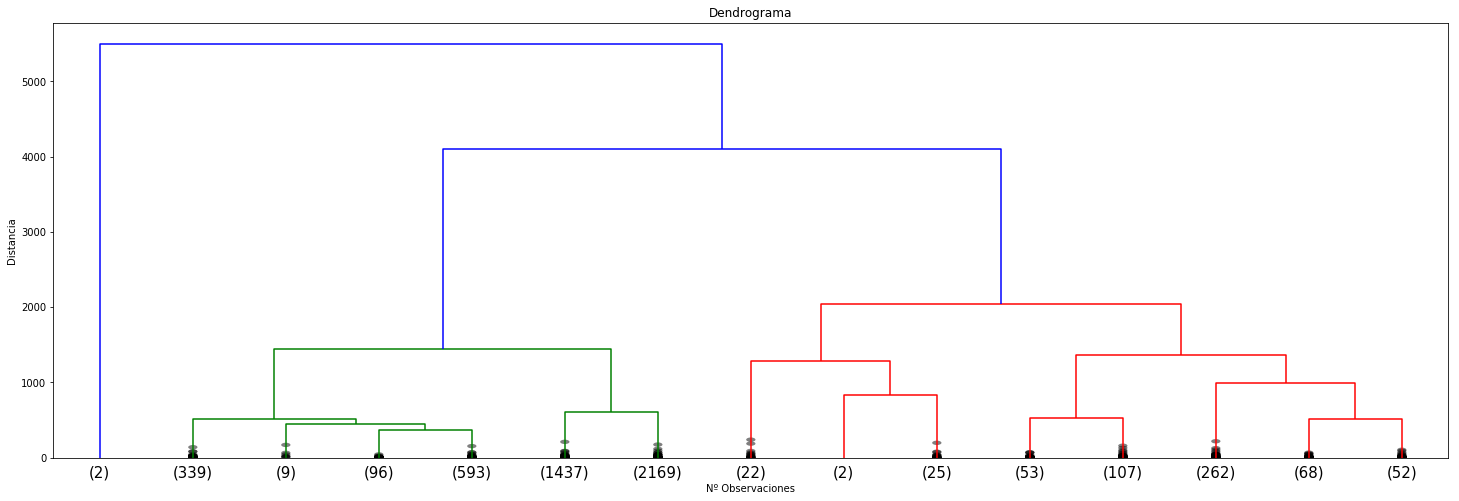

In [0]:
#Obtención del dendrograma:

plt.figure(figsize=(25,8))
plt.title("Dendrograma")
plt.xlabel("Nº Observaciones")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=0., leaf_font_size=15.0, truncate_mode="lastp", p=15, show_leaf_counts=True,
           show_contracted=True) #'p=' cambia el nº de sub-cluster a mostrar.
plt.show()

Viendo el dendograma, lo más claro sería inclinarse por 3 clusters diferentes, aunque podríamos hablar también de 4 o 7 clusters.

[5500.01157194 4101.92904644 2038.48955709 1443.3241849  1364.88915125
 1289.1031172   990.54051642  839.1674013   601.81533003  523.33831844
  518.52291293  517.15610592  448.39138916  365.2229591   327.0566067 ]


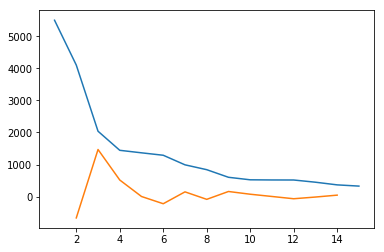

El número óptimo de cluster es 3


In [0]:
#Método del codo:

last = Z[-15:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

#Aceleración:
acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

Continúo el trabajo empleando **3 clusters**

In [0]:
from scipy.cluster.hierarchy import fcluster

In [0]:
##Usando el nº de cluster 'k':

k = 3
clusters = fcluster(Z, k, criterion="maxclust")

data_cluster = data.copy()

data_cluster['Cluster'] = clusters
data_cluster.head()

,Aboard,Fatalities,Ground,Cluster
0,2.0,1.0,0.0,2
1,5.0,5.0,0.0,2
2,1.0,1.0,0.0,2
3,20.0,14.0,0.0,2
4,30.0,30.0,0.0,2


In [0]:
#Medias de pasajeros, pasajeros fallecidos y personas en tierra fallecias para cada Cluster:

data_cluster.groupby('Cluster').mean()

,Aboard,Fatalities,Ground
Cluster,,,
1,78.500000,78.500000,2750.000000
2,15.542322,12.340513,0.542322
3,122.059222,80.905245,0.707276


In [0]:
#Información estadística:

data_cluster.groupby('Cluster').describe()

Aboard                                                            \
          count        mean        std   min    25%    50%     75%    max   
Cluster                                                                     
1           2.0   78.500000  19.091883  65.0  71.75   78.5   85.25   92.0   
2        4643.0   15.542322  14.242442   0.0   4.00   11.0   22.00   84.0   
3         591.0  122.059222  69.300585  53.0  78.00  102.0  142.50  644.0   

        Fatalities              ...                   Ground               \
             count       mean   ...       75%    max   count         mean   
Cluster                         ...                                         
1              2.0  78.500000   ...     85.25   92.0     2.0  2750.000000   
2           4643.0  12.340513   ...     18.00   84.0  4643.0     0.542322   
3            591.0  80.905245   ...    109.00  583.0   591.0     0.707276   

                                                           
              std     min     25%     50%     75%     max  
Cluster                                                    
1        0.000000  2750.0  2750.0  2750.0  2750.0  2750.0  
2        5.973560     0.0     0.0     0.0     0.0   225.0  
3        3.858593     0.0     0.0     0.0     0.0    47.0  

[3 rows x 24 columns]

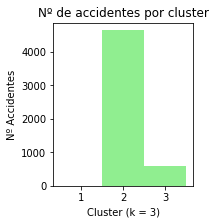

In [0]:
#Histograma: número de accidentes en cada cluster:

plt.figure(figsize=(2.5, 3))
plt.hist(data_cluster['Cluster'], align='left', color='lightgreen', bins=[1,2,3,4])
plt.xlabel('Cluster (k = 3)')
plt.ylabel('Nº Accidentes')
plt.title('Nº de accidentes por cluster')
plt.show()

In [0]:
#Observación en detalle del cluster nº 1 que recoge los dos aviones estrellados en los atentados de NY de 2001.

data_cluster[data_cluster['Cluster'] == 1]

,Aboard,Fatalities,Ground,Cluster
4803,92.0,92.0,2750.0,1
4804,65.0,65.0,2750.0,1


De los 3 clusters creados, uno de ellos recoge casi el 90% de las observaciones. Voy a crear una nueva división indicando k=7 para obtener una mayor segregación de los datos:

In [0]:
k = 7
clusters_7 = fcluster(Z, k, criterion="maxclust")

data_cluster_7 = data.copy()

data_cluster_7['Cluster'] = clusters_7
data_cluster_7.head()

,Aboard,Fatalities,Ground,Cluster
0,2.0,1.0,0.0,3
1,5.0,5.0,0.0,3
2,1.0,1.0,0.0,3
3,20.0,14.0,0.0,3
4,30.0,30.0,0.0,2


In [0]:
#Medias de pasajeros, pasajeros fallecidos y personas en tierra fallecias para cada Cluster:

##Pasajeros:
data_cluster_7.groupby('Cluster')['Aboard'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
1,2.0,78.500000,19.091883,65.0,71.75,78.5,85.25,92.0
2,1037.0,37.427194,11.459335,2.0,28.00,35.0,45.00,84.0
3,3606.0,9.248752,6.787315,0.0,3.00,7.0,14.00,34.0
4,22.0,320.636364,59.694098,257.0,291.25,301.0,337.50,517.0
5,27.0,285.814815,94.674762,213.0,232.00,260.0,282.50,644.0
6,160.0,139.143750,28.244852,101.0,115.00,132.0,160.00,226.0
7,382.0,91.892670,32.920512,53.0,70.00,83.0,100.00,239.0


In [0]:
##Pasajeros fallecidos:
data_cluster_7.groupby('Cluster')['Fatalities'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
1,2.0,78.500000,19.091883,65.0,71.75,78.5,85.25,92.0
2,1037.0,29.687560,12.973494,0.0,24.00,29.0,38.00,84.0
3,3606.0,7.351913,5.832294,0.0,3.00,5.0,11.00,23.0
4,22.0,19.818182,40.377547,0.0,1.00,2.0,14.25,155.0
5,27.0,279.296296,88.253923,183.0,229.00,259.0,282.50,583.0
6,160.0,128.218750,27.927280,59.0,109.00,123.5,145.00,200.0
7,382.0,50.583770,32.321337,0.0,13.00,61.0,77.00,100.0


In [0]:
##Personas fallecidas en tierra:
data_cluster_7.groupby('Cluster')['Ground'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
1,2.0,2750.000000,0.000000,2750.0,2750.0,2750.0,2750.0,2750.0
2,1037.0,1.016393,10.766866,0.0,0.0,0.0,0.0,225.0
3,3606.0,0.405990,3.542632,0.0,0.0,0.0,0.0,63.0
4,22.0,0.136364,0.467563,0.0,0.0,0.0,0.0,2.0
5,27.0,0.666667,2.303843,0.0,0.0,0.0,0.0,11.0
6,160.0,1.012500,5.183413,0.0,0.0,0.0,0.0,45.0
7,382.0,0.615183,3.376790,0.0,0.0,0.0,0.0,47.0


In [0]:
#Vista de datos medios:

data_cluster_7.groupby('Cluster').mean()

,Aboard,Fatalities,Ground
Cluster,,,
1,78.500000,78.500000,2750.000000
2,37.427194,29.687560,1.016393
3,9.248752,7.351913,0.405990
4,320.636364,19.818182,0.136364
5,285.814815,279.296296,0.666667
6,139.143750,128.218750,1.012500
7,91.892670,50.583770,0.615183


In [0]:
#Recuento de fallecidos en tierra:

print('Número de accidentes con 10 o más fallecidos en tierra: ', data_cluster_7[data_cluster_7['Ground'] >= 10].shape[0])
data_cluster_7[data_cluster_7['Ground'] >= 10].head()

Número de accidentes con 10 o más fallecidos en tierra:  68


,Aboard,Fatalities,Ground,Cluster
296,3.0,3.0,11.0,3
478,1.0,1.0,52.0,3
518,1.0,1.0,22.0,3
607,10.0,10.0,20.0,3
621,10.0,10.0,63.0,3


In [0]:
#Observación de casos en los que los vuelos llevaban más de 340 pasajeros:

print('Número de vuelos con 340 o más pasjeros: ', data_cluster_7[data_cluster_7['Aboard'] >= 340].shape[0])
data_cluster_7[data_cluster_7['Aboard'] >= 340].head(10)

Número de vuelos con 340 o más pasjeros:  10


,Aboard,Fatalities,Ground,Cluster
2726,346.0,346.0,0.0,5
2963,644.0,583.0,0.0,5
3378,394.0,50.0,0.0,4
3568,524.0,520.0,0.0,5
3640,384.0,16.0,1.0,4
3829,356.0,9.0,0.0,4
4154,340.0,56.0,0.0,4
4455,349.0,349.0,0.0,5
4536,393.0,1.0,0.0,4
4645,517.0,1.0,0.0,4


De los anteriores, solo 3 vuelos superan los 400 pasajeros, de hecho, superan los 500.

In [0]:
#El accidente con más víctimas:

data[2963:2964]

2963    Both aircraft were diverted to Tenerife becaus...
Name: Summary, dtype: object

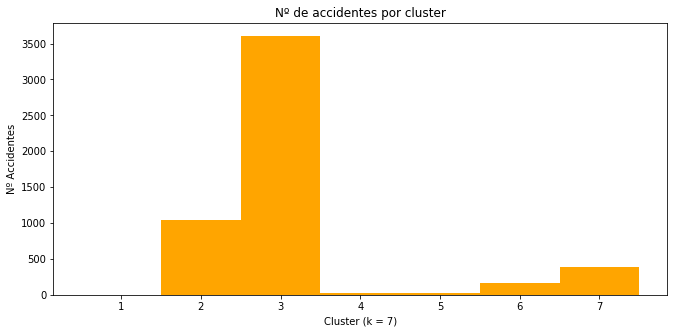

In [0]:
#Histograma: número de accidentes en cada cluster:

plt.figure(figsize=(11, 5))
plt.hist(data_cluster_7['Cluster'], bins=[1,2,3,4,5,6,7,8], align='left', color='orange')
plt.xlabel('Cluster (k = 7)')
plt.ylabel('Nº Accidentes')
plt.title('Nº de accidentes por cluster')
plt.show()

### Análisis de los clusters:

* El **cluster-1** hace referencia a los dos aviones de los atentados de NY que impactaron contra las Torres Gemelas.

* El **cluster-2** recoge el 20% del total de accidentes (el segundo grupo más numeroso). Sus características son accidentes en aeronaves cuyo promedio de pasajeros es de 37 personas (se presume que son aeronaves de tamaño medio) y en el 75% de los casos, de menos de 45 pasajeros. El promedio de fallecidos es de 30 pasajeros y en el 75% de los casos, menos de 40 personas. La tasa promedio de fallecidos es alta, superior al 80% de pasajeros.

* El **cluster-3** es el más numeroso, con un 67,5% de los accidentes registrados. Son accidentes en los que el vuelo, de media, transportaba a 9 personas y en el 75% de los casos, menos de 14 pasajeros. Por tanto, es de suponer que son vuelos de pequeños aviones o no destinados al transporte comercial. La tasa de fallecidos también es alta, siendo de media el 79,5% de los pasajeros.

* El **cluster-4** solo recoge el 0,42% de los casos (22 accidentes). Son vuelos con 320 pasajeros de media y 20 fallecidos promedio por accidente.

* El **cluster-5** es el segundo más pequeño con un 0,52% de los casos (27 accidentes). Los vuelos transportan de media a 285 pasajeros y la tasa media de fallecidos es altísima, con casi un 98% de los pasajeros. Podrían resumirse los cluster 4 y 5 como aquellos que segmentan a los accidentes de vuelos más númerosos (podríamos pensar en vuelos intercontinentales o de largo recorrido) con la diferencia de que el primero (cluster 4) deja una tasa de fallecidos del 6% y el segundo (cluster 5) del 98%.

* El **cluster-6** agrupa 160 accidentes, el 3% del total. La media de pasajeros de estos vuelos ha sido de 139 y en el 75% de los casos, de menos de 160 personas. La tasa media de fallecidos en el vuelo asciende a más del 92%.

* El **cluster-7** supone el 7,3% de los accidentes (382 vuelos). La ocupación promedio de los vuelos es de 92 pasajeros e inferior a 100 en el 75% de los casos. La tasa de fallecidos es del 55%. Los cifras de pasajeros de los cluster 6 y 7 hacen pensar que agrupan vuelos nacionales y continentales de medio alcance.

Respecto a las victimas en tierra, como es de esperar, encontramos que la media por accidente es igual o inferior a 1. Existen casos puntuales que sería interesante tratar (queda fuera del alcance de la primera versión de este análisis) y como resumen, de los más de 5.200 vuelos que componen el DataSet de estudio, un 1,3% (68 accidentes) ha registrado 10 o más fallecidos en tierra.